In [ ]:
!pip install pycocotools --quiet

# Clone TorchVision repo and copy helper files
!git clone https://github.com/pytorch/vision.git
%cd vision
!git checkout v0.5.1
%cd ..
!cp vision/references/detection/utils.py ./
!cp vision/references/detection/transforms.py ./
!cp vision/references/detection/coco_eval.py ./
!cp vision/references/detection/engine.py ./
!cp vision/references/detection/coco_utils.py ./

Cloning into 'vision'...
remote: Enumerating objects: 104859, done.
remote: Counting objects: 100% (39990/39990), done.
remote: Compressing objects: 100% (3205/3205), done.
remote: Total 104859 (delta 37009), reused 39263 (delta 36579), pack-reused 64869
Receiving objects: 100% (104859/104859), 205.59 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (90088/90088), done.
/content/vision
Branch 'v0.5.1' set up to track remote branch 'v0.5.1' from 'origin'.
Switched to a new branch 'v0.5.1'
/content


In [ ]:
!wget http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz

--2022-03-12 09:58:30--  http://peipa.essex.ac.uk/pix/mias/all-mias.tar.gz
Resolving peipa.essex.ac.uk (peipa.essex.ac.uk)... 155.245.93.3
Connecting to peipa.essex.ac.uk (peipa.essex.ac.uk)|155.245.93.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111154265 (106M) [application/gzip]
Saving to: ‘all-mias.tar.gz’

all-mias.tar.gz     100%[===================>] 106.00M  11.3MB/s    in 10s     

2022-03-12 09:58:41 (10.4 MB/s) - ‘all-mias.tar.gz’ saved [111154265/111154265]



In [ ]:
!mkdir data
!tar -xzvf "/content/all-mias.tar.gz" -C "/content/data" 

Info.txt
Licence.txt
README
mdb001.pgm
mdb002.pgm
mdb003.pgm
mdb004.pgm
mdb005.pgm
mdb006.pgm
mdb007.pgm
mdb008.pgm
mdb009.pgm
mdb010.pgm
mdb011.pgm
mdb012.pgm
mdb013.pgm
mdb014.pgm
mdb015.pgm
mdb016.pgm
mdb017.pgm
mdb018.pgm
mdb019.pgm
mdb020.pgm
mdb021.pgm
mdb022.pgm
mdb023.pgm
mdb024.pgm
mdb025.pgm
mdb026.pgm
mdb027.pgm
mdb028.pgm
mdb029.pgm
mdb030.pgm
mdb031.pgm
mdb032.pgm
mdb033.pgm
mdb034.pgm
mdb035.pgm
mdb036.pgm
mdb037.pgm
mdb038.pgm
mdb039.pgm
mdb040.pgm
mdb041.pgm
mdb042.pgm
mdb043.pgm
mdb044.pgm
mdb045.pgm
mdb046.pgm
mdb047.pgm
mdb048.pgm
mdb049.pgm
mdb050.pgm
mdb051.pgm
mdb052.pgm
mdb053.pgm
mdb054.pgm
mdb055.pgm
mdb056.pgm
mdb057.pgm
mdb058.pgm
mdb059.pgm
mdb060.pgm
mdb061.pgm
mdb062.pgm
mdb063.pgm
mdb064.pgm
mdb065.pgm
mdb066.pgm
mdb067.pgm
mdb068.pgm
mdb069.pgm
mdb070.pgm
mdb071.pgm
mdb072.pgm
mdb073.pgm
mdb074.pgm
mdb075.pgm
mdb076.pgm
mdb077.pgm
mdb078.pgm
mdb079.pgm
mdb080.pgm
mdb081.pgm
mdb082.pgm
mdb083.pgm
mdb084.pgm
mdb085.pgm
mdb086.pgm
mdb087.pgm
mdb088.pgm
mdb0

In [ ]:
!rm data/mdb059.pgm
!rm data/mdb216.pgm

In [ ]:
!pip install albumentations==0.4.6
!pip install torchsummary

     |████████████████████████████████| 117 kB 10.0 MB/s 
     |████████████████████████████████| 948 kB 50.2 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65174 sha256=88301899ea5699cbd908a8680f55eadad1e352c70e6a95bc3aafbedd1f0b087b
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torchvision
from torchvision import transforms as torchtrans  
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import os
import csv
import albumentations as A
from albumentations.pytorch.transforms import ToTensor
import torchvision.models as models
from torchsummary import summary
# helper libraries
from engine import train_one_epoch, evaluate
import utils
import transforms as T

# for image augmentations
import albumentations as A
from albumentations.pytorch.transforms import ToTensor, ToTensorV2

In [ ]:
file_with_bbox = []
with open('/content/data/Info.txt') as f:
      for line in f:
        parsed = line.split(' ')
        if len(parsed) == 7:
          file_with_bbox.append(parsed[0]+".pgm") 
file_with_bbox.remove('mdb216.pgm')
print(sorted(list(set(file_with_bbox[2:]))))
print(len(list(set(file_with_bbox[2:]))))

['mdb001.pgm', 'mdb002.pgm', 'mdb005.pgm', 'mdb010.pgm', 'mdb012.pgm', 'mdb013.pgm', 'mdb015.pgm', 'mdb017.pgm', 'mdb019.pgm', 'mdb021.pgm', 'mdb023.pgm', 'mdb025.pgm', 'mdb028.pgm', 'mdb030.pgm', 'mdb032.pgm', 'mdb058.pgm', 'mdb063.pgm', 'mdb069.pgm', 'mdb072.pgm', 'mdb075.pgm', 'mdb080.pgm', 'mdb081.pgm', 'mdb083.pgm', 'mdb090.pgm', 'mdb091.pgm', 'mdb092.pgm', 'mdb095.pgm', 'mdb097.pgm', 'mdb099.pgm', 'mdb102.pgm', 'mdb104.pgm', 'mdb105.pgm', 'mdb107.pgm', 'mdb110.pgm', 'mdb111.pgm', 'mdb115.pgm', 'mdb117.pgm', 'mdb120.pgm', 'mdb121.pgm', 'mdb124.pgm', 'mdb125.pgm', 'mdb126.pgm', 'mdb127.pgm', 'mdb130.pgm', 'mdb132.pgm', 'mdb134.pgm', 'mdb141.pgm', 'mdb142.pgm', 'mdb144.pgm', 'mdb145.pgm', 'mdb148.pgm', 'mdb150.pgm', 'mdb152.pgm', 'mdb155.pgm', 'mdb158.pgm', 'mdb160.pgm', 'mdb163.pgm', 'mdb165.pgm', 'mdb167.pgm', 'mdb170.pgm', 'mdb171.pgm', 'mdb175.pgm', 'mdb178.pgm', 'mdb179.pgm', 'mdb181.pgm', 'mdb184.pgm', 'mdb186.pgm', 'mdb188.pgm', 'mdb190.pgm', 'mdb191.pgm', 'mdb193.pgm', 'mdb1

In [ ]:
# defining the files directory and testing directory
files_dir = '/content/data/'
test_dir = '/content/data/'
info_dir = '/content/data/Info.txt'
# we create a Dataset class which has a __getitem__ function and a __len__ function
class ImageDataset(torch.utils.data.Dataset):

  def __init__(self, files_dir, info_dir, width, height, transforms=None):
    self.transforms = transforms
    self.files_dir = files_dir
    self.info_dir = info_dir
    self.height = height
    self.width = width
    
    # sorting the images for consistency
    # To get images, the extension of the filename is checked to be jpg
    self.imgs = list(set(file_with_bbox[2:]))   #[image for image in set(os.listdir(files_dir)) if image[-4:]=='.pgm'] 
    self.imgs.sort()
    # classes: 0 index is reserved for background
    self.classes = [_, 'suspicious lesion']

  def __getitem__(self, idx):
    img_name = self.imgs[idx]
    image_path = os.path.join(self.files_dir, img_name)
    # reading the images and converting them to correct size and color    
    img = cv2.imread(image_path, -1)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img_res = cv2.resize(img_rgb, (self.width, self.height), cv2.INTER_AREA)
    # diving by 255
    img_res /= 255.0
    #img_res = 1 - img_res
    
    boxes = []
    labels = []
    
    # cv2 image gives size as height x width
    wt = img.shape[1]
    ht = img.shape[0]
    check = False
    # box coordinates for xml files are extracted and corrected for image size given
    with open(info_dir) as f:
      for line in f:
        parsed = line.split(' ')
        if parsed[0] == img_name[:-4]:
            labels.append(1)
        
            x_center = int(parsed[4])
            y_center = int(parsed[5])
            box_wt = 2 * int(parsed[6])
            box_ht = box_wt

            xmin = x_center - box_wt/2
            xmax = x_center + box_wt/2
            ymin = y_center - box_ht/2
            ymax = y_center + box_ht/2
            
            xmin_corr = int(xmin/1024.0*self.width)
            xmax_corr = int(xmax/1024.0*self.width)
            ymax_corr = self.height-int(ymin/1024.0*self.height)
            ymin_corr = self.height-int(ymax/1024.0*self.height)
            
            boxes.append([xmin_corr, ymin_corr, xmax_corr, ymax_corr])

      # convert boxes into a torch.Tensor
      boxes = torch.as_tensor(boxes, dtype=torch.float32)
      
      # getting the areas of the boxes
      area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

      # suppose all instances are not crowd
      iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)
      
      labels = torch.as_tensor(labels, dtype=torch.int64)

      target = {}
      target["boxes"] = boxes
      target["labels"] = labels
      target["area"] = area
      target["iscrowd"] = iscrowd
      image_id = torch.tensor([idx])
      target["image_id"] = image_id

    if self.transforms:
      sample = self.transforms(image = img_res,
                                bboxes = target['boxes'],
                                labels = labels)
      img_res = sample['image']
      target['boxes'] = torch.Tensor(sample['bboxes'])
       
    return img_res, target

  def __len__(self):
    return len(self.imgs)


# check dataset
dataset = ImageDataset(files_dir, info_dir, 1024, 1024)
print('Length of dataset:', len(dataset), '\n')

# getting the image and target for a test index.  Feel free to change the index.
img, target = dataset[10]
print('Image shape:', img.shape)
print('Label example:', target)

Length of dataset: 111 

Image shape: (1024, 1024, 3)
Label example: {'boxes': tensor([[509., 314., 567., 372.]]), 'labels': tensor([1]), 'area': tensor([3364.]), 'iscrowd': tensor([0]), 'image_id': tensor([10])}


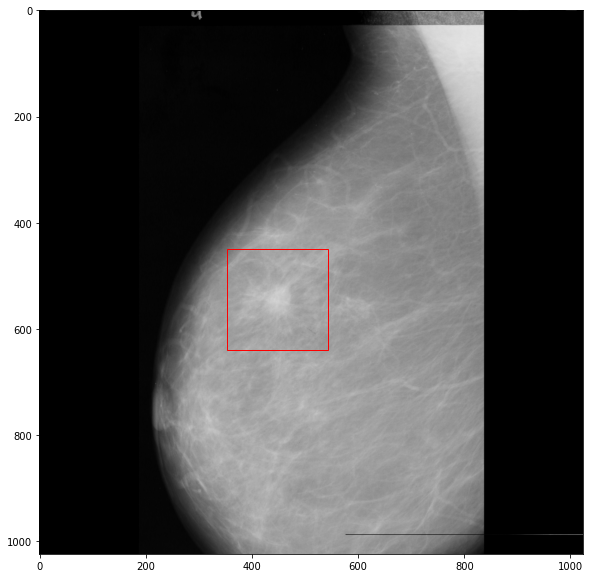

In [ ]:
# Function to visualize bounding boxes in the image
def plot_img_bbox(img, target):
  # plot the image and bboxes
  # Bounding boxes are defined as follows: x-min y-min width height
  fig, a = plt.subplots(1,1)
  fig.set_size_inches(10,10)
  if img.shape[0] == 3:
    img = img.permute(1,2,0)
  a.imshow(img)
  for box in (target['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (x, y),
      width, height,
      linewidth = 1,
      edgecolor = 'r',
      facecolor = 'none'
    )
    # Draw the bounding box on top of the image
    a.add_patch(rect)
  
  plt.show()
    
# plotting the image with bboxes. Feel free to change the index
img, target = dataset[53]
plot_img_bbox(img, target)

In [ ]:
from albumentations.augmentations.transforms import VerticalFlip
# Send train=True for training transforms and False for val/test transforms
def get_transform(train):
  if train:
    return A.Compose(
      [
        A.HorizontalFlip(0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.VerticalFlip(0.5),
        A.RandomSnow(p=0.5),
        A.RandomShadow(p=0.2),
        A.RandomContrast(0.5),
        ToTensorV2(p=1.0) 
      ],
      bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']}
    )
  else:
    return A.Compose(
      [ToTensorV2(p=1.0)],
      bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']}
    )

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


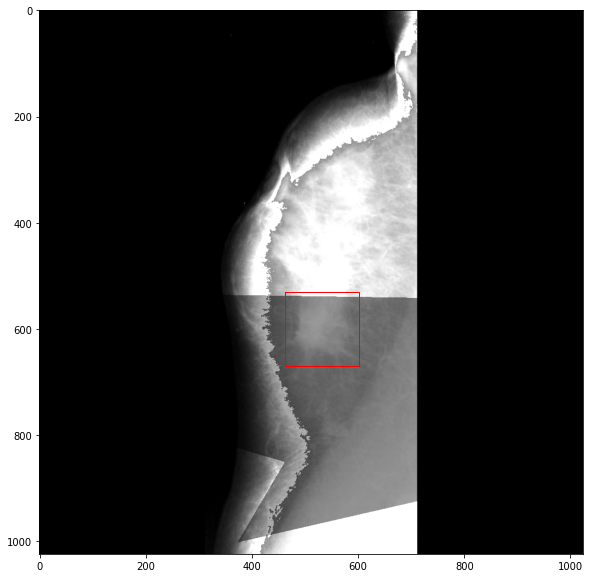

In [ ]:
# use our dataset and defined transformations
dataset = ImageDataset(files_dir, info_dir, 1024, 1024, transforms=get_transform(train=True))
dataset_test = ImageDataset(files_dir, info_dir, 1024, 1024, transforms=get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()

# train test split
test_split = 0.2
tsize = int(len(dataset)*test_split)
dataset = torch.utils.data.Subset(dataset, indices[:-tsize])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-tsize:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
  dataset,
  batch_size=4,
  shuffle=True,
  num_workers=4,
  collate_fn=utils.collate_fn,
)

data_loader_test = torch.utils.data.DataLoader(
  dataset_test,
  batch_size=4,
  shuffle=False,
  num_workers=4,
  collate_fn=utils.collate_fn,
)

img, target = dataset[6]
plot_img_bbox(img, target)

In [ ]:
def get_object_detection_model(num_classes):
  # load a model pre-trained on COCO
  model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
  # get number of input features for the classifier
  in_features = model.roi_heads.box_predictor.cls_score.in_features
  # replace the pre-trained head with a new one
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes) 
  return model

In [ ]:
# train on gpu if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 2 # one class (class 0) is dedicated to the "background"

# get the model using our helper function
model = get_object_detection_model(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
#optimizer = torch.optim.Adam(params)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(
  optimizer,
  step_size=3,
  gamma=0.1
)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
# training for 15 epochs
num_epochs = 5

for epoch in range(num_epochs):
    # training for one epoch
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: [0]  [ 0/23]  eta: 0:00:55  lr: 0.000232  loss: 0.1886 (0.1886)  loss_classifier: 0.0563 (0.0563)  loss_box_reg: 0.1203 (0.1203)  loss_objectness: 0.0082 (0.0082)  loss_rpn_box_reg: 0.0039 (0.0039)  time: 2.3920  data: 1.3349  max mem: 3313
Epoch: [0]  [10/23]  eta: 0:00:12  lr: 0.002502  loss: 0.2013 (0.2027)  loss_classifier: 0.0690 (0.0699)  loss_box_reg: 0.0943 (0.0951)  loss_objectness: 0.0222 (0.0271)  loss_rpn_box_reg: 0.0046 (0.0106)  time: 0.9954  data: 0.1496  max mem: 3313
Epoch: [0]  [20/23]  eta: 0:00:02  lr: 0.004773  loss: 0.2013 (0.2001)  loss_classifier: 0.0715 (0.0723)  loss_box_reg: 0.0832 (0.0939)  loss_objectness: 0.0199 (0.0253)  loss_rpn_box_reg: 0.0046 (0.0086)  time: 0.8213  data: 0.0250  max mem: 3313
Epoch: [0]  [22/23]  eta: 0:00:00  lr: 0.005000  loss: 0.2013 (0.2031)  loss_classifier: 0.0700 (0.0730)  loss_box_reg: 0.0832 (0.0982)  loss_objectness: 0.0180 (0.0237)  loss_rpn_box_reg: 0.0040 (0.0082)  time: 0.7825  data: 0.0240  max mem: 3313
Epoch: [

In [ ]:
# the function takes the original prediction and the iou threshold.
def apply_nms_and_conf_thresh(orig_prediction, iou_thresh=0.3, conf_thresh=0.5):
  # torchvision returns the indices of the bboxes to keep
  keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
  keep = [int(i.cpu().numpy()) for i in keep if orig_prediction['scores'][i] >=conf_thresh]
  final_prediction = orig_prediction.copy()
  final_prediction['boxes'] = final_prediction['boxes'][keep]
  final_prediction['scores'] = final_prediction['scores'][keep]
  final_prediction['labels'] = final_prediction['labels'][keep]
  
  return final_prediction

def apply_nms(orig_prediction, iou_thresh=0.3, conf_thresh=0.5):
  # torchvision returns the indices of the bboxes to keep
  keep = torchvision.ops.nms(orig_prediction['boxes'], orig_prediction['scores'], iou_thresh)
  final_prediction = orig_prediction.copy()
  final_prediction['boxes'] = final_prediction['boxes'][keep]
  final_prediction['scores'] = final_prediction['scores'][keep]
  final_prediction['labels'] = final_prediction['labels'][keep]
  
  return final_prediction

# function to convert a torchtensor back to PIL image
def torch_to_pil(img):
  return torchtrans.ToPILImage()(img).convert('RGB')

In [ ]:
# Function to visualize bounding boxes in the image
def plot_img_bbox_compare(img, target, pred):
  # plot the image and bboxes
  # Bounding boxes are defined as follows: x-min y-min width height
  fig, (a1, a2) = plt.subplots(1,2)
  fig.set_size_inches(15,15)
  if img.shape[0] == 3:
    img = img.permute(1,2,0)
  a1.imshow(img)
  a2.imshow(img)
  for box in (target['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (x, y),
      width, height,
      linewidth = 1,
      edgecolor = 'r',
      facecolor = 'none'
    )
    # Draw the bounding box on top of the image
    a1.add_patch(rect)
  for box in (pred['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (x, y),
      width, height,
      linewidth = 1,
      edgecolor = 'r',
      facecolor = 'none'
    )
  
    # Draw the bounding box on top of the image
    a2.add_patch(rect)
    a1.set_xlabel("ground truth")
    a2.set_xlabel("prediction")
  plt.show()

In [ ]:
# Function to visualize bounding boxes in the image
def plot_img_bbox_compare2(img, target, pred1, pred2, pred3):
  # plot the image and bboxes
  # Bounding boxes are defined as follows: x-min y-min width height
  fig, (a1, a2, a3, a4) = plt.subplots(1,4)
  fig.set_size_inches(35,35)
  if img.shape[0] == 3:
    img = img.permute(1,2,0)
  a1.imshow(img)
  a2.imshow(img)
  a3.imshow(img)
  a4.imshow(img)
  for box in (target['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (x, y),
      width, height,
      linewidth = 1,
      edgecolor = 'r',
      facecolor = 'none'
    )
    # Draw the bounding box on top of the image
    a1.add_patch(rect)
  for box in (pred1['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (x, y),
      width, height,
      linewidth = 1,
      edgecolor = 'r',
      facecolor = 'none'
    )
  
    # Draw the bounding box on top of the image
    a2.add_patch(rect)
  for box in (pred2['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (x, y),
      width, height,
      linewidth = 1,
      edgecolor = 'r',
      facecolor = 'none'
    )
  
    # Draw the bounding box on top of the image
    a3.add_patch(rect)
  for box in (pred3['boxes']):
    x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
    rect = patches.Rectangle(
      (x, y),
      width, height,
      linewidth = 1,
      edgecolor = 'r',
      facecolor = 'none'
    )
  
    # Draw the bounding box on top of the image
    a4.add_patch(rect)
    a1.set_xlabel("ground truth")
    a2.set_xlabel("prediction")
    a3.set_xlabel("prediction with NMS")
    a4.set_xlabel("prediction with NMS (additional step)")
  plt.show()

22
MODEL OUTPUT



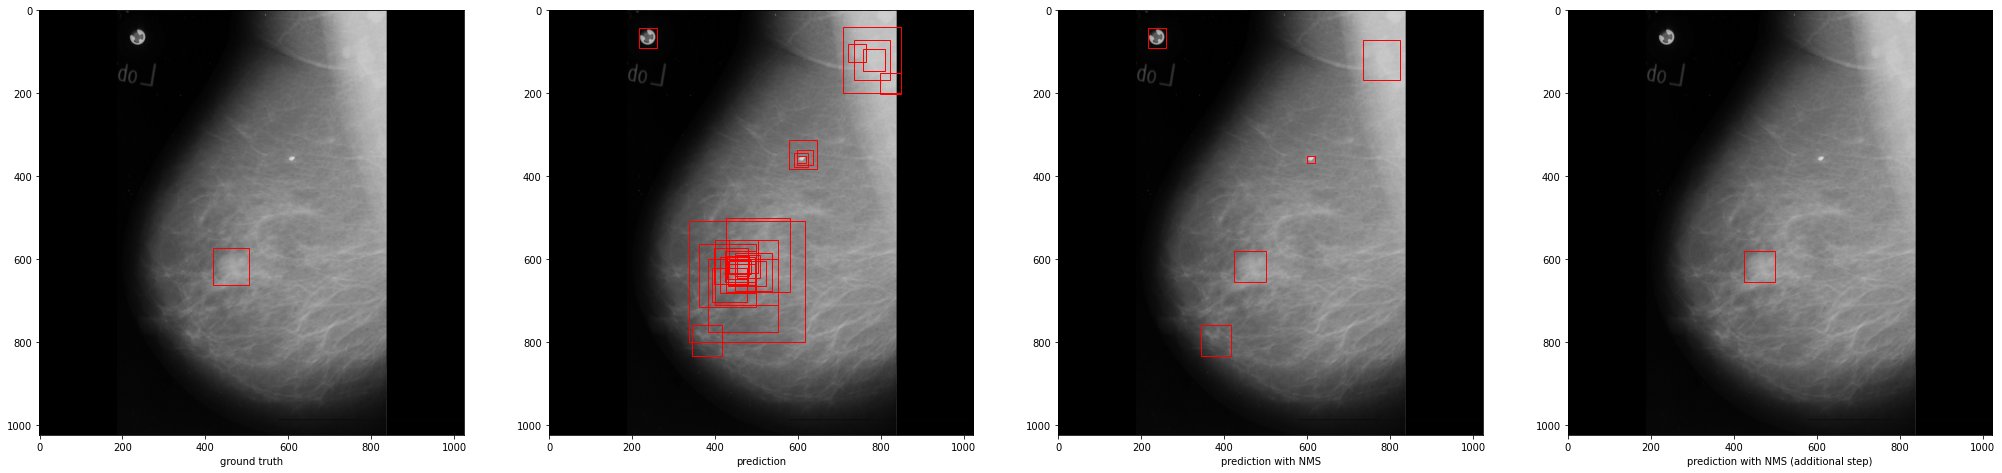

In [ ]:
#test_dataset = ImageDataset(test_dir, info_dir, 1024, 1024, transforms= get_transform(train=False))
#print(len(test_dataset))
# pick one image from the test set
print(len(dataset_test))
img, target = dataset_test[17]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
  prediction = model([img.to(device)])[0]

print('MODEL OUTPUT\n')

nms_v2_prediction = apply_nms_and_conf_thresh(prediction, iou_thresh=0.01, conf_thresh=0.4)
nms_prediction = apply_nms(prediction, iou_thresh=0.01)
nms_prediction['boxes'] = nms_prediction['boxes'].cpu()
nms_v2_prediction['boxes'] = nms_v2_prediction['boxes'].cpu()
prediction['boxes'] = prediction['boxes'].cpu()    
plot_img_bbox_compare2(img, target, prediction, nms_prediction, nms_v2_prediction) 

In [ ]:
torch.save(model.state_dict(), 'checkpoint.pth')